In [4]:
#Clusters for profile descriptions

import pandas as pd

# Load your data
df_descriptions = pd.read_csv('analysis/desc.csv')
df_signatures = pd.read_csv('analysis/sig.csv')

# Display the first few rows
print(df_descriptions.head())
print(df_signatures.head())


              authorId                                          signature  \
0  6755279996182348805  Estadounidense viviendo en Madriz\nI hate Madr...   
1  7008216250564805637  Hi, I’m Ali🌈\n🌸I help people travel cheap\n👇🏼g...   
2  6747770185614312453  Digital Nomad w/ Remote Work Tips\nHow You Can...   
3  6764845416200307717  🚀🗺️✨🌍🫶\nmy digital travel diary\ntips, inspo a...   
4  7175147257800639494  💙Best Travel Destinations for 2023💙\nMy travel...   

                                         descProfile month   tier_jan  \
0  Chueca es genial 😭 #madridgay #madridgaylife #...   Jan     medium   
1  Driving in morocco & seeing a tree full of goa...   Jan  very high   
2  This country will basically PAY tourists to vi...   Jan  very high   
3  secret spots in london, pt. one #londontravelg...   Jan       high   
4  I found travel gem in Germany, second Venice i...   Jan       high   

    tier_apr  hdbscan  
0     medium       -1  
1  very high        0  
2  very high       -1  
3 

3714

In [5]:
# renaming 'hdbscan' columns
df_signatures.rename(columns={'hdbscan':'hdbscan_sig'}, inplace=True)
df_descriptions.rename(columns={'hdbscan':'hdbscan_desc'}, inplace=True)

# merging two dataframes
df_with_cluster = pd.merge(df_signatures, df_descriptions, on=list(set(df_signatures.columns) & set(df_descriptions.columns)))



In [6]:
# Count the number of each tier in each cluster
cluster_tier_counts = df_with_cluster.groupby(['hdbscan_sig', 'tier_jan']).size().reset_index(name='counts')

# Display the counts
print(cluster_tier_counts)


   hdbscan_sig   tier_jan  counts
0            0       high     884
1            0        low     976
2            0     medium     919
3            0  very high     870
4            1       high      12
5            1        low      26
6            1     medium      23
7            1  very high       4


In [29]:
#Do tier members tend to stick together in the same cluster

# Group by 'cluster', 'tier_jan', 'tier_apr' and count 'authorId's
cluster_tier_counts = df.groupby(['hdbscan', 'tier_jan', 'tier_apr'])['authorId'].count().reset_index(name='count')

# Sort by 'count' in descending order
cluster_tier_counts = cluster_tier_counts.sort_values('count', ascending=False)

# Display the sorted DataFrame
print(cluster_tier_counts)


     hdbscan   tier_jan   tier_apr  count
3         -1        low        low    276
6         -1     medium     medium    247
0         -1       high       high    238
7         -1  very high  very high    226
10         0        low        low    104
..       ...        ...        ...    ...
194       35        low     medium      1
203       37     medium       high      1
276       54     medium     medium      1
240       46     medium       high      1
323       65  very high  very high      1

[324 rows x 4 columns]


In [30]:
# Add a new column indicating whether 'tier_jan' is different from 'tier_apr'
df['tier_changed'] = df['tier_jan'] != df['tier_apr']

# Group by 'cluster', 'tier_changed' and count 'authorId's
cluster_tier_change_counts = df.groupby(['hdbscan', 'tier_changed'])['authorId'].count().reset_index(name='count')

# Display the DataFrame
print(cluster_tier_change_counts)


     hdbscan  tier_changed  count
0         -1         False    987
1         -1          True     72
2          0         False    328
3          0          True     21
4          1         False    128
..       ...           ...    ...
103       62         False     16
104       63         False     14
105       63          True      2
106       64         False     16
107       65         False     15

[108 rows x 3 columns]


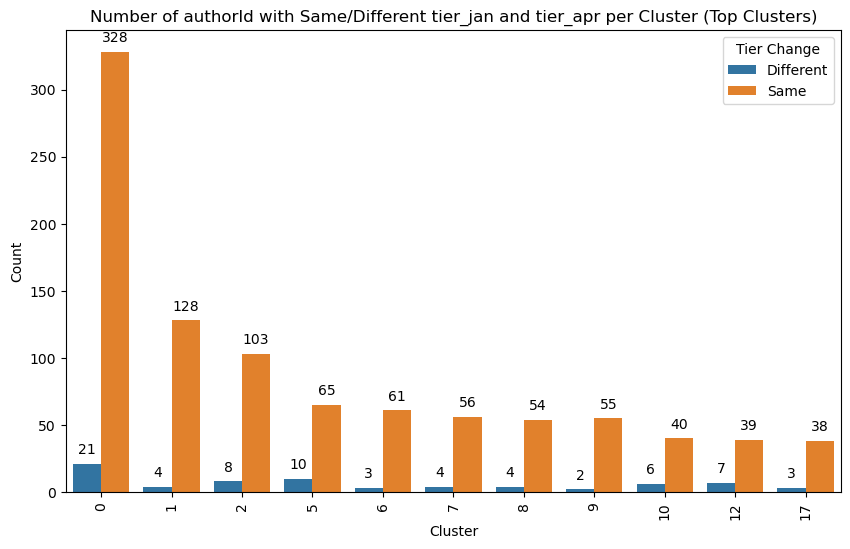

In [55]:
#Creating a plot answering question: 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'tier_change' column
df['tier_change'] = np.where(df['tier_jan'] == df['tier_apr'], 'Same', 'Different')

# Filter out '-1' clusters
df_filtered = df[df['hdbscan'] != -1]

# Group by 'cluster' and 'tier_change' and get counts
counts = df_filtered.groupby(['hdbscan', 'tier_change'])['authorId'].count().reset_index()

# Get top 20 clusters for 'Same' and 'Different' tier changes
top_same_clusters = counts[counts['tier_change'] == 'Same'].sort_values(by='authorId', ascending=False)[:20]['hdbscan'].values
top_diff_clusters = counts[counts['tier_change'] == 'Different'].sort_values(by='authorId', ascending=False)[:20]['hdbscan'].values

# Get intersection of top clusters
top_clusters = list(set(top_same_clusters).intersection(top_diff_clusters))

# Filter 'counts' for only 'top_clusters'
counts = counts[counts['hdbscan'].isin(top_clusters)]

plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='hdbscan', y='authorId', hue='tier_change', data=counts)
plt.title('Number of authorId with Same/Different tier_jan and tier_apr per Cluster (Top Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Tier Change')

# Add labels to the top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()



In [26]:
#Importing topic descriptions

df_topic_description = pd.read_csv('analysis/desc_top.txt', delimiter='\t')

# Display the first few rows
print(df_topic_description.head())

  Topic  0  -  [('digitalnomad', 0.02065581512875382), ('travel', 0.01906435798554413), ('solotravel', 0.017821596683626414), ('traveltiktok', 0.015260859457773722), ('digitalnomadlife', 0.014240346264157436), ('digitalnomadlifestyle', 0.012840511075278536), ('to', 0.01226043985698316), ('fulltimetravel', 0.011984511174873437), ('digitalnomadgirl', 0.011350054107669276), ('you', 0.011267801024131404)]
0  Topic  1  -  [('corporate', 0.0679257455538871...                                                                                                                                                                                                                                                                                                                                                                
1  Topic  2  -  [('digitalnomadlifestyle', 0.0224...                                                                                                                                          

In [50]:
# Import necessary libraries
import re
import ast

# Define the topics you are interested in
topics_of_interest = [0, 2, 5, 10, 12]

# Initialize an empty dictionary to store keywords for each topic
keywords_dict = {}

# Open and read the file
with open('analysis/desc_top.txt', 'r') as file:
    for line in file:
        # Split the line into topic number and keywords
        topic_num_str, keywords_str = line.split(' - ', 1)
        
        # Extract the topic number
        topic_num = int(re.search(r'\d+', topic_num_str).group())

        
        # Check if the topic is in your topics of interest
        if topic_num in topics_of_interest:
            # Convert the keywords string to a list of tuples
            keywords_list = ast.literal_eval(keywords_str.strip())

            # Extract only the keywords, without their scores
            keywords = [keyword for keyword, score in keywords_list]

            # Add the keywords to your dictionary
            keywords_dict[topic_num] = keywords
        
# Print the keywords for each topic of interest
for topic, keywords in keywords_dict.items():
    print(f"Keywords for topic {topic}: {', '.join(keywords)}")



Keywords for topic 0: digitalnomad, travel, solotravel, traveltiktok, digitalnomadlife, digitalnomadlifestyle, to, fulltimetravel, digitalnomadgirl, you
Keywords for topic 2: digitalnomadlifestyle, success, digitalnomad, digitalnomadlife, onlinebusinessowner, onlinebusiness, entrepreneur, digitalnomadgirl, you, life
Keywords for topic 5: digitalnomadgirl, digitalnomad, digitalnomadlife, sevierville, gatlinburgtennessee, gatlinburg, digitálisnomádok, digitalnomadlifestyle, de, nomadadigital
Keywords for topic 10: brazil, argentina, peru, guatemala, jujuy, selinalife, urielbetancourtideas, jerga, brazilians, con
Keywords for topic 12: dubai, egypt, uae, pyramidsofgiza, foryou, arab, messi, balkantiktok, lebanon, tiktokegypt


In [48]:
keywords_str.strip()

"[('digitalnomad', 0.02065581512875382), ('travel', 0.01906435798554413), ('solotravel', 0.017821596683626414), ('traveltiktok', 0.015260859457773722), ('digitalnomadlife', 0.014240346264157436), ('digitalnomadlifestyle', 0.012840511075278536), ('to', 0.01226043985698316), ('fulltimetravel', 0.011984511174873437), ('digitalnomadgirl', 0.011350054107669276), ('you', 0.011267801024131404)]"